# 1. Dot Product

Write a function `matrix_multiply(A, B)` using for loops, `+` and `*` that takes in two matrices (can be list of lists, or 2d numpy array) and returns their dot product (matrix multiplication). It should work with column vectors ($k \times 1$ dimensions) and row vectors ($1 \times k$) normally.


```import numpy as np

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

matrix_multiply(A,B)

RETURNS: 
[[30, 36, 42],
 [66, 81, 96]]

---------example 2-------------
# This is a row vector
A = np.array([
    [1,2,3]
])

# This is a column vector
B = np.array([
    [1],
    [4],
    [7]
])

matrix_multiply(A,B)

RETURNS:
[[30]]

```

Use `np.dot` to test your output

In [7]:
import numpy as  np
def matmul(matrix1_,matrix2_):
    result = [] # final result

    for i in range(len(matrix1_)):

        row = [] # the new row in new matrix
        for j in range(len(matrix2_[0])):

            product = 0 # the new element in the new row

            for v in range(len(matrix1_[i])):
                 product += matrix1_[i][v] * matrix2_[v][j]
            row.append(product) # append sum of product into the new row

        result.append(row) # append the new row into the final result
    return result

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]
print(matmul(A,B))
np.dot(A,B)

[[30, 36, 42], [66, 81, 96]]


array([[30, 36, 42],
       [66, 81, 96]])

# 2 Matrix Math torture

**2.1** Give a 3 examples of non-invertible square matrices that are non-zero

**2.2** Explain why the identity matrix $I$ is necessarily a square matrix with only $1$'s on the diagonal (hint: use the dot product from Q1)

**2.3** The **trace** is commutative for two matrices so $tr(AB) = tr(BA)$. Give an example where this is false for 3 matrices which can all be multiplied together.

**2.4** Give an example of a nonzero $4 \times 4$ idempotent matrix (where $A \cdot A = A^2 = A$)

**2.5** solve the following system of equations for `x`, `y` and `z` using matrices and `numpy.linalg.solve`

$$x 	+ 	y 	+ 	z 	= 	6$$

  	  	$$2y 	+ 	5z 	= 	−4$$

$$2x 	+ 	5y 	− 	z 	= 	27$$

In [6]:
#2.1 Give a 3 examples of non-invertible square matrices that are non-zero
"""
A matrix M is invertible or non-singular if there exists another matrix N that satisfies the two eqalities  MN  = I, where I is an identity matrix of the  appropriate size. 
"""
A = [
    [1,2],
    [2,4]
]
B = [
    [9,6],
    [12,8]
]
C = [
    [3,3],
    [3,5]
]
#2.2 Explain why the identity matrix I is necessarily a square matrix with only 1's on the diagonal (hint: use the dot product from Q1)
"""
When a matrix is multiplied by its inverse it gives unit matrix.Now there is no unit matrix which is not square.Also for an inverse to exist matrix must have nonzero value of its determinant.A nonsquare matrix do not have determinant.
"""

#2.3 The trace is commutative for two matrices so  tr(AB)=tr(BA). Give an example where this is false for 3 matrices which can all be multiplied together.

A = [
    [1,3],
    [-1,2]
]
B = [
    [4,0],
    [5,1]
]

AB = np.dot(A,B)
BA = np.dot(B,A)
print(AB,BA)

C = [
    [1,2],
    [1,4]
]
D = [
    [0,3],
    [2,1]
]

CD = np.dot(C,D)
DC = np.dot(D,C)
print(CD,DC)

E = [
    [1,1],
    [2,1]
]
F = [
    [2,1],
    [1,1]
]

EF = np.dot(E,F)
FE = np.dot(F,E)
print(EF,FE)

#2.4 Give an example of a nonzero 4×4 idempotent matrix (where A ⋅ A = A^2 = A)
A = [
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
]


[[19  3]
 [ 6  2]] [[ 4 12]
 [ 4 17]]
[[4 5]
 [8 7]] [[ 3 12]
 [ 3  8]]
[[3 2]
 [5 3]] [[4 3]
 [3 2]]


In [32]:
#2.5 solve the following system of equations for x, y and z using matrices and numpy.linalg.solve
#x + y + z = 6
#2y + 5z = −4
#2x + 5y − z = 27
Coeff = [[1,1,1],[0,2,5],[2,5,-1]]
Y = [6,-4,27]
X = np.linalg.inv(Coeff).dot(Y)
X

array([ 5.,  3., -2.])

# 3.1 Boston regression

Using statsmodels and the `boston` dataset, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_boston
import statsmodels.api as sm

boston_dataset = load_boston()
#print(boston_dataset.keys())

#boston_dataset.append('MEDV')

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

#collrealtion matrix to measure the linear relationships between the variable
#correlation_matrix = boston.corr().round(2)

#sns.heatmap(data=correlation_matrix, annot=True)
boston['MEDV'] = boston_dataset.target
boston = sm.add_constant(boston)
boston.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [24]:
X_train = boston.drop('MEDV',axis=1)
y_train = boston['MEDV']

est = sm.OLS(y_train, X_train).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 11 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        20:08:40   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
print(f"The coefficients for the regression are given by:\n{est.params}")
print(f"The R-squared is: {est.rsquared:.3f}")

The coefficients for the regression are given by:
const      36.459488
CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
dtype: float64
The R-squared is: 0.741


<function matplotlib.pyplot.show(close=None, block=None)>

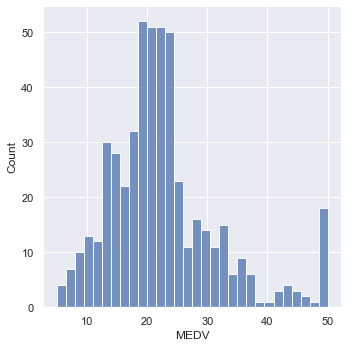

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(boston['MEDV'], bins=30)
plt.show

<AxesSubplot:>

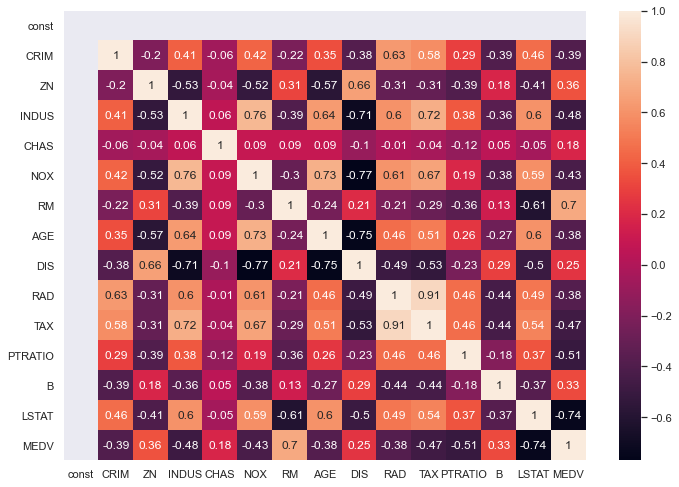

In [31]:
#measures the linear relationships betweenn the variables
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

"""
LSTAT has a high negative correlatin with MEDV (-0.74)
RM has a strong positive correlation with MEDV (0.7)
"""

# 3.2 Polynomial features

Use polynomial features to improve your regression model in `2.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

In [42]:

from numpy import asarray
from sklearn.preprocessing import PolynomialFeatures

# define the dataset
boston_2 = boston.copy()

#remove features with a low p-value 
boston_2 = boston_2.drop(columns=['INDUS', 'AGE', 'ZN'])

#boston_2.head()

boston_2['RM_2'] = boston_2['RM'] ** 2
boston_2['CRIM_2'] = boston_2['CRIM'] ** 2
boston_2['LSTAT_2'] = boston_2['LSTAT'] ** 2
boston_2['LSTAT_3'] = boston_2['LSTAT'] ** 3

y = boston_2['MEDV']
X = boston_2.drop(columns=['MEDV'])

est = sm.OLS(y, sm.add_constant(X)).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     177.7
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          7.05e-182
Time:                        08:33:27   Log-Likelihood:                -1405.7
No. Observations:                 506   AIC:                             2841.
Df Residuals:                     491   BIC:                             2905.
Df Model:                          14                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        123.9533     14.298      8.669      0.000      95.930     151.977
CRIM          -0.3332      0.090     -3.688      0.000      -0.510      -0.156
CHAS           2.2034      1.308      1.684      0.092      -0.361       4.768
NOX          -15.5375      2.654     -5.854      0.000     -20.739     -10.336
RM           -22.2760      5.456     -4.083      0.000     -32.970     -11.582
DIS           -1.0676      0.167     -6.379      0.000      -1.396      -0.740
RAD            0.2947      0.056      5.291      0.000       0.186       0.404
TAX           -0.0081      0.003     -3.151      0.002      -0.013      -0.003
PTRATIO       -0.7622      0.119     -6.390      0.000      -0.996      -0.528
B              0.0063      0.002      3.379      0.001       0.003       0.010
LSTAT         -2.0191      0.431     -4.684      0.000      -2.864      -1.174
RM_2           1.9765      0.455      4.344      0.000       1.085       2.868
CRIM_2         0.0026      0.001      2.050      0.040       0.000       0.005
LSTAT_2        0.0693      0.023      2.989      0.003       0.024       0.115
LSTAT_3       -0.0009      0.000     -2.216      0.027      -0.002      -0.000
==============================================================================
Omnibus:                      185.787   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3373.390
Skew:                           1.109   Prob(JB):                         0.00
Kurtosis:                      15.453   Cond. No.                     4.73e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 4.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.3 Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.

- The y axis on each chart is the target value (house price)

- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each

- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well

- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

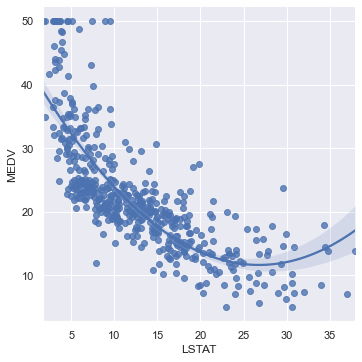

In [47]:
sns.lmplot(x="LSTAT", y="MEDV", data=boston_2, order=2)

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

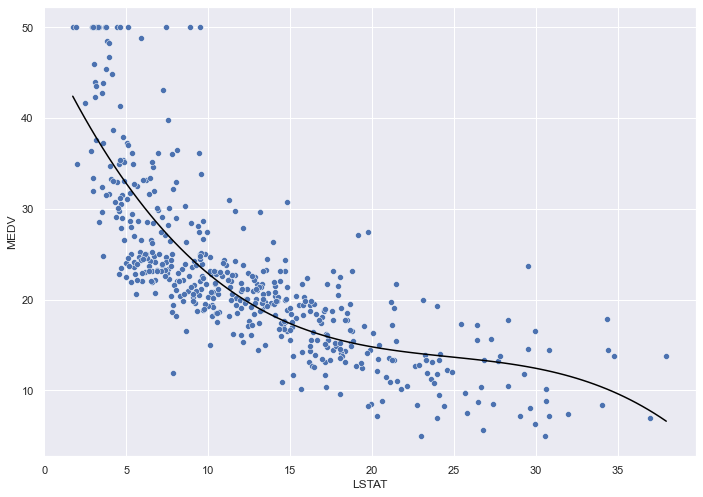

In [51]:
x = boston_2.LSTAT
fmin, fmax = boston_2.LSTAT.min(), boston_2.LSTAT.max()
coefs = np.polyfit(x, y, 3)
sns.scatterplot(x,y)

xfit = np.linspace(fmin, fmax, 100)
yfit = np.polyval(coefs, xfit)
sns.lineplot(xfit, yfit, color="black")

# 3.4 Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **2.4** but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

In [55]:
def multi_plotting(feature, ax, degree=2):
    x = boston_2[feature]
    fmin, fmax = boston_2[feature].min(), boston_2[feature].max()
    coefs = np.polyfit(x, y, degree)
    sns.scatterplot(x, y, ax=ax)

    xfit = np.linspace(fmin, fmax, 100)
    yfit = np.polyval(coefs, xfit)
    sns.lineplot(xfit, yfit, color="black", ax=ax)


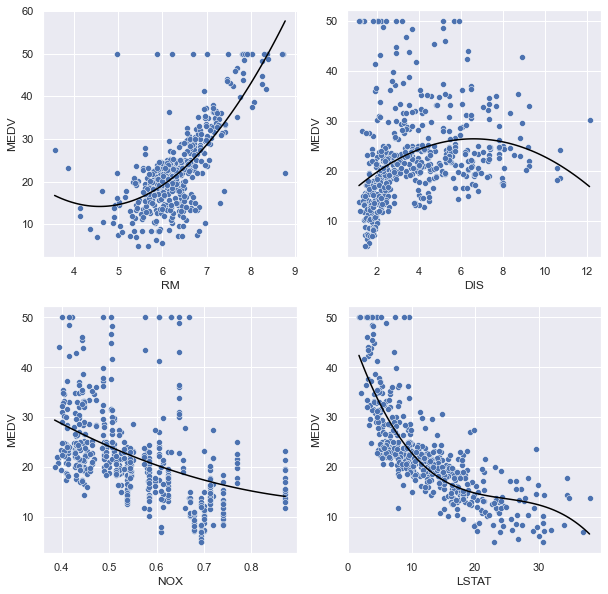

In [59]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))
multi_plotting('RM', ax1)
multi_plotting('DIS', ax2, 2)
multi_plotting('NOX', ax3)
multi_plotting('LSTAT', ax4, 3)